Voy a analizar si quiza haya alguna relacion (aka mas chances de ganar la stage)
cuando los account y opportunity owner matchean.

Text(0.5, 1.0, 'Won Rate')

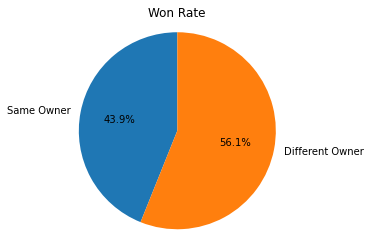

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Entrenamieto_ECI_2020.csv')
data.drop_duplicates('Opportunity_ID', inplace=True) #Los owners se mantienen entre oportunidades asi que dropeo las repetidas
data = data[data['Stage'].isin(['Closed Won', 'Closed Lost'])]
data.replace(['Closed Won', 'Closed Lost'], [1, 0], inplace=True)

data = data[['Account_Owner', 'Opportunity_Owner', 'Stage']]

sameOwners = data[data['Account_Owner'] == data['Opportunity_Owner']]

diffOwners = data[data['Account_Owner'] != data['Opportunity_Owner']]

owners = pd.DataFrame(columns=['Won Rate'])
owners['Won Rate'] = (sameOwners['Stage'].mean(), diffOwners['Stage'].mean())
owners.rename(index={0:'Same Owner', 1:'Different Owner'}, inplace=True)
owners = owners.reset_index().rename(columns={'index':''})

fig1, ax1 = plt.subplots()
ax1.pie(owners['Won Rate'], labels=owners[''], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Won Rate')

In [94]:
oppVsAccOwner = data.groupby(['Account_Owner', 'Opportunity_Owner']).agg({'Stage':['mean', 'count']}).unstack()

def filter_func(x):
    for i in x:
        if i > 5:
            return 1
    return 0

filteredPersons = oppVsAccOwner[('Stage', 'count')].agg(filter_func, axis='columns').reset_index()
filteredPersons = filteredPersons[filteredPersons[0] == 1]#Me quedo con las personas que trabajaron al menos 5 veces con algun otro
oppVsAccOwner = oppVsAccOwner.reset_index().merge(filteredPersons, how='inner', on='Account_Owner')
oppVsAccOwner

#oppVsAccOwner = oppVsAccOwner[['Account_Owner', ('Account_Owner', '', '')]]
#colores = plt.get_cmap("Blues")
#colores.set_bad(color='black', alpha=0.5)
#fig = plt.figure(num=None, figsize=(12, 12), dpi = 100)
#sns.heatmap(data=oppVsAccOwner, cmap=colores)

/home/marcos/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,Account_Owner,"(Account_Owner, , )","(Stage, mean, Person_Name_0)","(Stage, mean, Person_Name_10)","(Stage, mean, Person_Name_11)","(Stage, mean, Person_Name_12)","(Stage, mean, Person_Name_13)","(Stage, mean, Person_Name_14)","(Stage, mean, Person_Name_16)","(Stage, mean, Person_Name_18)",...,"(Stage, count, Person_Name_59)","(Stage, count, Person_Name_60)","(Stage, count, Person_Name_61)","(Stage, count, Person_Name_62)","(Stage, count, Person_Name_63)","(Stage, count, Person_Name_64)","(Stage, count, Person_Name_65)","(Stage, count, Person_Name_66)","(Stage, count, Person_Name_8)",0
0,Person_Name_11,Person_Name_11,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Person_Name_13,Person_Name_13,NaN,NaN,0.000000,NaN,0.581395,0.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Person_Name_14,Person_Name_14,NaN,NaN,NaN,NaN,0.000000,0.391304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Person_Name_16,Person_Name_16,NaN,NaN,NaN,NaN,1.000000,NaN,0.269923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Person_Name_18,Person_Name_18,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,0.492846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,Person_Name_2,Person_Name_2,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Person_Name_21,Person_Name_21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,1
7,Person_Name_26,Person_Name_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,Person_Name_29,Person_Name_29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,Person_Name_3,Person_Name_3,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1
